# Ejemplo de Regresión Gamma

### Bibliotecas

In [13]:
# Bibliotecas a utilizar 
import numpy                   as np      # Uso de álgebra lineal, funciones vectoriales
import pandas                  as pd      # Trabajar con DataFrames
import matplotlib.pyplot       as plt     # Para realizar gráficas
#!{sys.executable} -m pip install seaborn
import seaborn                 as sns     # Otras funciones para graficar

#!{sys.executable} -m pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')
sns.set()

# Referencias
# https://www.statsmodels.org/stable/glm.html
# https://www.statsmodels.org/stable/generated/statsmodels.genmod.families.family.Gaussian.html#statsmodels.genmod.families.family.Gaussian
# https://www.statsmodels.org/stable/generated/statsmodels.genmod.families.family.Gamma.html#statsmodels.genmod.families.family.Gamma    

### Importación de los datos

In [14]:
datos = pd.read_csv("FootballLeague.csv")
datos.head()
# La base contiene informacion de una temporada de Futbol Americano
# y: Games won (per 14 game season)
# x1: Rushing yards (season)
# x2: Passing yards (season)
# x3: Punting yards (yds/punt)
# x4: Field goal percentage (Field goals made/Field goals attempted_season)
# x5: Turnover differential (turnovers acquired_turnovers lost)
# x6: Penalty yards (season)
# x7: Percent rushing (rushing plays/total plays)
# x8: Opponent's rushing yards
# x9: Opponent's passing yards

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,X
0,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917,7.593374
1,11,2003,2855,38.8,61.3,3,615,55.0,2096,1575,7.956827
2,11,2957,1737,40.1,60.0,14,914,65.6,1847,2175,7.459915
3,13,2285,2905,41.6,45.3,4,957,61.4,1903,2476,7.974189
4,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866,7.418181


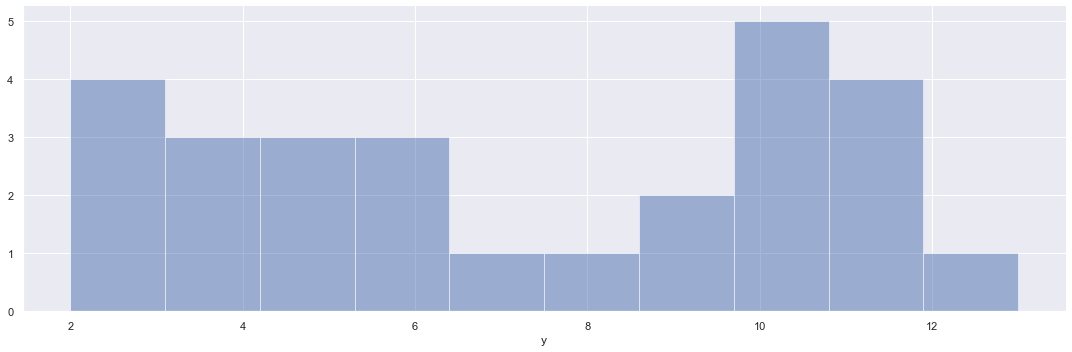

In [3]:
sns.FacetGrid( datos, height=5, aspect=3 ).map(plt.hist, "y", alpha=0.5)
plt.show()

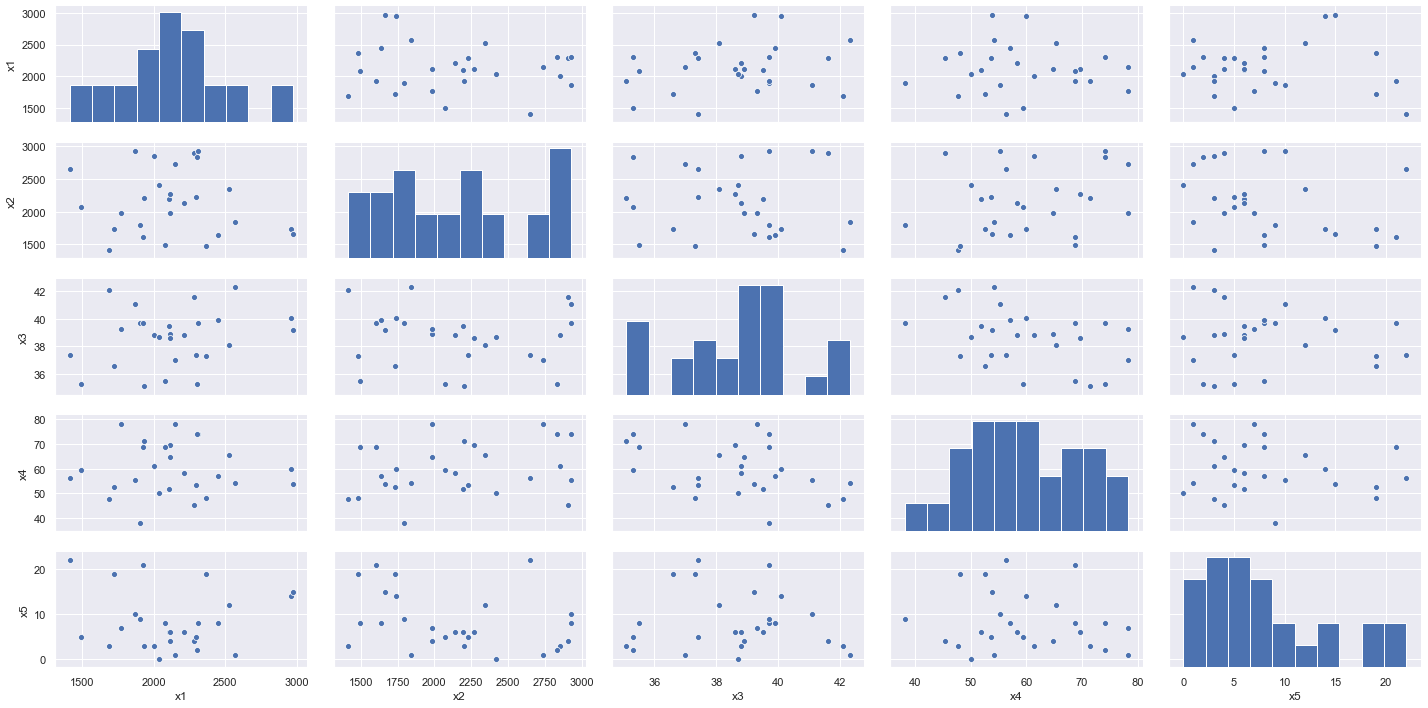

In [4]:
sns.pairplot(datos.iloc[:,1:6], height=2, aspect=2)
plt.show()

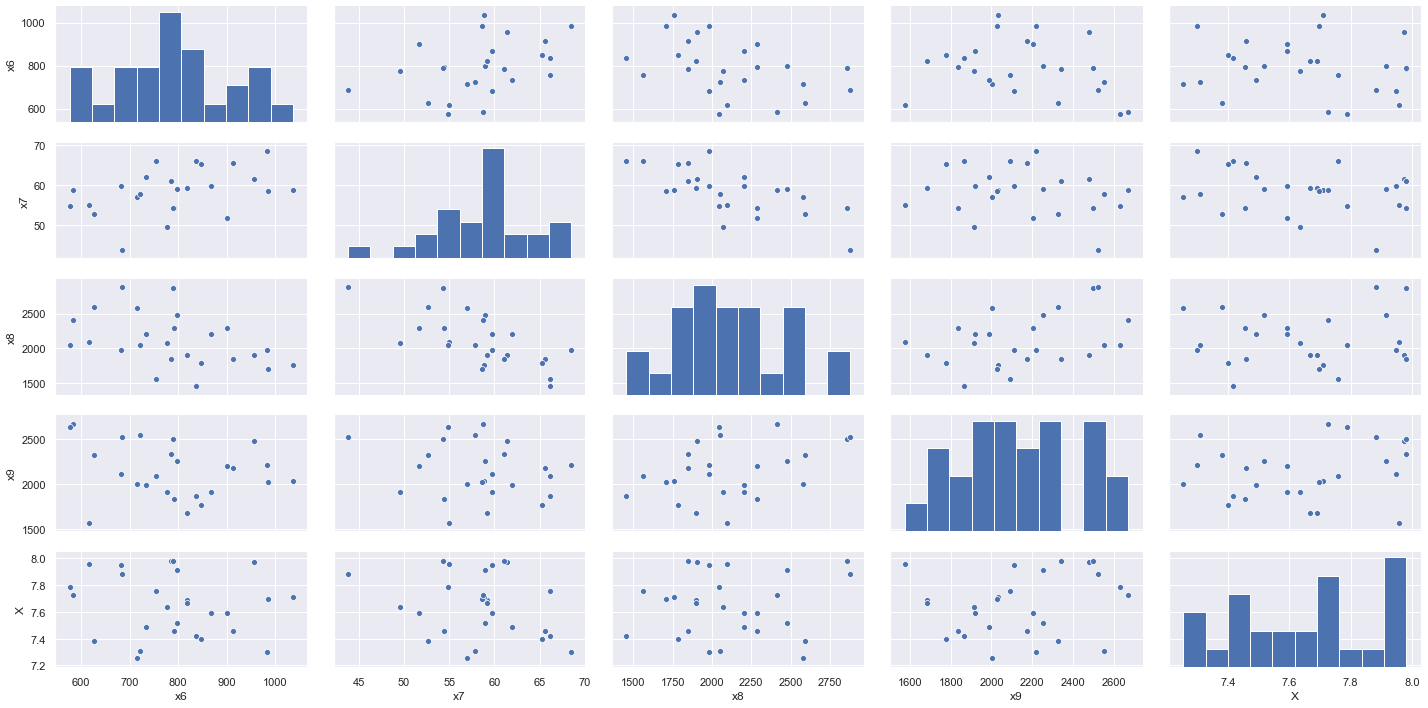

In [5]:
sns.pairplot(datos.iloc[:,6:11], height=2, aspect=2)
plt.show()

### Creación del modelo

In [15]:
Y = datos.values[:,0]
X = datos.values[:,1:11]

modelo_normal  = sm.GLM(Y, X, family=sm.families.Gaussian() ).fit()
modelo_gamma   = sm.GLM(Y, X, family=sm.families.Gamma() ).fit()
modelo_poisson = sm.GLM(Y, X, family=sm.families.Poisson() ).fit()

### Resumenes

In [16]:
print( modelo_normal.summary() )

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   27
Model:                            GLM   Df Residuals:                       17
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                          3.4930
Method:                          IRLS   Log-Likelihood:                -48.951
Date:                Fri, 30 Aug 2019   Deviance:                       59.381
Time:                        18:26:49   Pearson chi2:                     59.4
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0005      0.002      0.219      0.8

In [8]:
print( modelo_normal.summary() )

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   27
Model:                            GLM   Df Residuals:                       17
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                          3.4930
Method:                          IRLS   Log-Likelihood:                -48.951
Date:                Fri, 30 Aug 2019   Deviance:                       59.381
Time:                        17:47:53   Pearson chi2:                     59.4
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0005      0.002      0.219      0.8

In [9]:
print( modelo_poisson.summary() )

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   27
Model:                            GLM   Df Residuals:                       17
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54.867
Date:                Fri, 30 Aug 2019   Deviance:                       9.2541
Time:                        17:47:53   Pearson chi2:                     8.57
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.000      0.380      0.7

### Comparaciones de los modelos

In [10]:
Y_normal  = modelo_normal.fittedvalues
Y_gamma   = modelo_gamma.fittedvalues
Y_poisson = modelo_poisson.fittedvalues

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, 'r--')

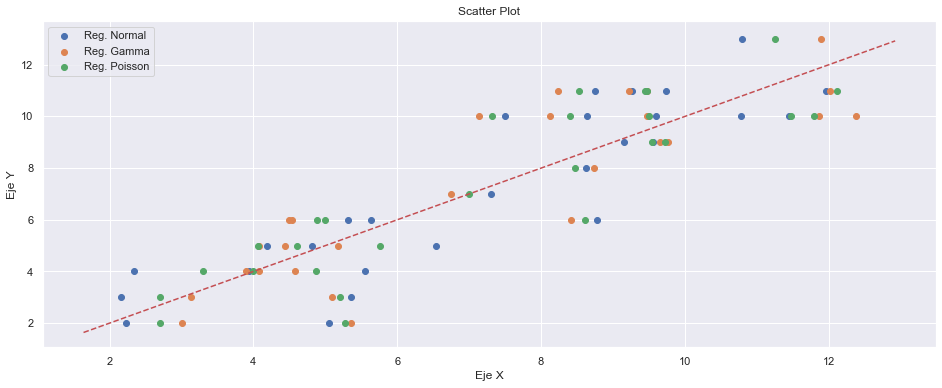

In [17]:
# Realizamos un grafico de dispersión ( Scatter-Plot )
plt.figure( figsize=(16,6) )                           # Indicamos el tamaño de la gráfica
plt.title("Scatter Plot")                              # Añadimos el titulo
plt.scatter( Y_normal,  Y , label = "Reg. Normal" )    # Añadimos la 'capa' de puntos 
plt.scatter( Y_gamma,   Y , label = "Reg. Gamma"  )    # Añadimos la 'capa' de puntos 
plt.scatter( Y_poisson, Y , label = "Reg. Poisson" )   # Añadimos la 'capa' de puntos 
abline( 1, 0 )
plt.xlabel("Eje X")                                    # Modificamos la etiqueta del eje X
plt.ylabel("Eje Y")                                    # Modificamos la etiqueta del eje Y
#plt.grid()                                            # Añadimos una cuadricula/rendija 
plt.legend()                                           # Añadimos un cuadro con la leyenda
plt.show()                                             # Indicamos que queremos mostrar la gráfica